# Analysis of results for the GAT with AIFB+ data

In [1]:
# imports needed:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from statistics import stdev as std
from scipy import stats
import random
import math
import modcomp
import json
import numpy as np

random.seed(0)

## Read in data:

In [2]:
results_filtered_1 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_1/results.csv")
results_filtered_2 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_2/results.csv")
results_filtered_3 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_3/results.csv")
results_filtered_4 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_4/results.csv")
results_filtered_5 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_5/results.csv")
results_filtered_6 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_6/results.csv")
results_filtered_7 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_7/results.csv")
results_filtered_8 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_8/results.csv")
results_filtered_9 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_9/results.csv")
results_filtered_10 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_10/results.csv")

results_alltoone_1 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_1/results.csv")
results_alltoone_2 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_2/results.csv")
results_alltoone_3 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_3/results.csv")
results_alltoone_4 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_4/results.csv")
results_alltoone_5 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_5/results.csv")
results_alltoone_6 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_6/results.csv")
results_alltoone_7 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_7/results.csv")
results_alltoone_8 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_8/results.csv")
results_alltoone_9 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_9/results.csv")
results_alltoone_10 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_10/results.csv")

results_collapsed_1 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_1/results.csv")
results_collapsed_2 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_2/results.csv")
results_collapsed_3 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_3/results.csv")
results_collapsed_4 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_4/results.csv")
results_collapsed_5 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_5/results.csv")
results_collapsed_6 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_6/results.csv")
results_collapsed_7 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_7/results.csv")
results_collapsed_8 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_8/results.csv")
results_collapsed_9 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_9/results.csv")
results_collapsed_10 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_10/results.csv")

results_separate_1 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_1/results.csv")
results_separate_2 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_2/results.csv")
results_separate_3 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_3/results.csv")
results_separate_4 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_4/results.csv")
results_separate_5 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_5/results.csv")
results_separate_6 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_6/results.csv")
results_separate_7 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_7/results.csv")
results_separate_8 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_8/results.csv")
results_separate_9 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_9/results.csv")
results_separate_10 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_10/results.csv")

## Process data:

In [3]:
# combine the test accuracies
accuracy_test_filtered = pd.concat([results_filtered_1['AccTest'], results_filtered_2['AccTest'], results_filtered_3['AccTest'], results_filtered_4['AccTest'], results_filtered_5['AccTest'],results_filtered_6['AccTest'], results_filtered_7['AccTest'], results_filtered_8['AccTest'], results_filtered_9['AccTest'], results_filtered_10['AccTest']],axis=1)
accuracy_test_alltoone = pd.concat([results_alltoone_1['AccTest'], results_alltoone_2['AccTest'], results_alltoone_3['AccTest'], results_alltoone_4['AccTest'], results_alltoone_5['AccTest'],results_alltoone_6['AccTest'], results_alltoone_7['AccTest'], results_alltoone_8['AccTest'], results_alltoone_9['AccTest'], results_alltoone_10['AccTest']],axis=1)
accuracy_test_collapsed = pd.concat([results_collapsed_1['AccTest'], results_collapsed_2['AccTest'], results_collapsed_3['AccTest'], results_collapsed_4['AccTest'], results_collapsed_5['AccTest'],results_collapsed_6['AccTest'], results_collapsed_7['AccTest'], results_collapsed_8['AccTest'], results_collapsed_9['AccTest'], results_collapsed_10['AccTest']],axis=1)
accuracy_test_separate = pd.concat([results_separate_1['AccTest'], results_separate_2['AccTest'], results_separate_3['AccTest'], results_separate_4['AccTest'], results_separate_5['AccTest'],results_separate_6['AccTest'], results_separate_7['AccTest'], results_separate_8['AccTest'], results_separate_9['AccTest'], results_separate_10['AccTest']],axis=1)

# make lists of the final test accuracies
final_accuracy_test_filtered = [results_filtered_1['AccTest'].iloc[-1], results_filtered_2['AccTest'].iloc[-1], results_filtered_3['AccTest'].iloc[-1], results_filtered_4['AccTest'].iloc[-1], results_filtered_5['AccTest'].iloc[-1],results_filtered_6['AccTest'].iloc[-1], results_filtered_7['AccTest'].iloc[-1], results_filtered_8['AccTest'].iloc[-1], results_filtered_9['AccTest'].iloc[-1], results_filtered_10['AccTest'].iloc[-1]]
final_accuracy_test_alltoone = [results_alltoone_1['AccTest'].iloc[-1], results_alltoone_2['AccTest'].iloc[-1], results_alltoone_3['AccTest'].iloc[-1], results_alltoone_4['AccTest'].iloc[-1], results_alltoone_5['AccTest'].iloc[-1],results_alltoone_6['AccTest'].iloc[-1], results_alltoone_7['AccTest'].iloc[-1], results_alltoone_8['AccTest'].iloc[-1], results_alltoone_9['AccTest'].iloc[-1], results_alltoone_10['AccTest'].iloc[-1]]
final_accuracy_test_collapsed = [results_collapsed_1['AccTest'].iloc[-1], results_collapsed_2['AccTest'].iloc[-1], results_collapsed_3['AccTest'].iloc[-1], results_collapsed_4['AccTest'].iloc[-1], results_collapsed_5['AccTest'].iloc[-1],results_collapsed_6['AccTest'].iloc[-1], results_collapsed_7['AccTest'].iloc[-1], results_collapsed_8['AccTest'].iloc[-1], results_collapsed_9['AccTest'].iloc[-1], results_collapsed_10['AccTest'].iloc[-1]]
final_accuracy_test_separate = [results_separate_1['AccTest'].iloc[-1], results_separate_2['AccTest'].iloc[-1], results_separate_3['AccTest'].iloc[-1], results_separate_4['AccTest'].iloc[-1], results_separate_5['AccTest'].iloc[-1],results_separate_6['AccTest'].iloc[-1], results_separate_7['AccTest'].iloc[-1], results_separate_8['AccTest'].iloc[-1], results_separate_9['AccTest'].iloc[-1], results_separate_10['AccTest'].iloc[-1]]

# combine the test f1
f1_test_filtered = pd.concat([results_filtered_1['f1Test'], results_filtered_2['f1Test'], results_filtered_3['f1Test'], results_filtered_4['f1Test'], results_filtered_5['f1Test'],results_filtered_6['f1Test'], results_filtered_7['f1Test'], results_filtered_8['f1Test'], results_filtered_9['f1Test'], results_filtered_10['f1Test']],axis=1)
f1_test_alltoone = pd.concat([results_alltoone_1['f1Test'], results_alltoone_2['f1Test'], results_alltoone_3['f1Test'], results_alltoone_4['f1Test'], results_alltoone_5['f1Test'],results_alltoone_6['f1Test'], results_alltoone_7['f1Test'], results_alltoone_8['f1Test'], results_alltoone_9['f1Test'], results_alltoone_10['f1Test']],axis=1)
f1_test_collapsed = pd.concat([results_collapsed_1['f1Test'], results_collapsed_2['f1Test'], results_collapsed_3['f1Test'], results_collapsed_4['f1Test'], results_collapsed_5['f1Test'],results_collapsed_6['f1Test'], results_collapsed_7['f1Test'], results_collapsed_8['f1Test'], results_collapsed_9['f1Test'], results_collapsed_10['f1Test']],axis=1)
f1_test_separate = pd.concat([results_separate_1['f1Test'], results_separate_2['f1Test'], results_separate_3['f1Test'], results_separate_4['f1Test'], results_separate_5['f1Test'],results_separate_6['f1Test'], results_separate_7['f1Test'], results_separate_8['f1Test'], results_separate_9['f1Test'], results_separate_10['f1Test']],axis=1)

# make lists of the final test f1
final_f1_test_filtered = [results_filtered_1['f1Test'].iloc[-1], results_filtered_2['f1Test'].iloc[-1], results_filtered_3['f1Test'].iloc[-1], results_filtered_4['f1Test'].iloc[-1], results_filtered_5['f1Test'].iloc[-1],results_filtered_6['f1Test'].iloc[-1], results_filtered_7['f1Test'].iloc[-1], results_filtered_8['f1Test'].iloc[-1], results_filtered_9['f1Test'].iloc[-1], results_filtered_10['f1Test'].iloc[-1]]
final_f1_test_alltoone = [results_alltoone_1['f1Test'].iloc[-1], results_alltoone_2['f1Test'].iloc[-1], results_alltoone_3['f1Test'].iloc[-1], results_alltoone_4['f1Test'].iloc[-1], results_alltoone_5['f1Test'].iloc[-1],results_alltoone_6['f1Test'].iloc[-1], results_alltoone_7['f1Test'].iloc[-1], results_alltoone_8['f1Test'].iloc[-1], results_alltoone_9['f1Test'].iloc[-1], results_alltoone_10['f1Test'].iloc[-1]]
final_f1_test_collapsed = [results_collapsed_1['f1Test'].iloc[-1], results_collapsed_2['f1Test'].iloc[-1], results_collapsed_3['f1Test'].iloc[-1], results_collapsed_4['f1Test'].iloc[-1], results_collapsed_5['f1Test'].iloc[-1],results_collapsed_6['f1Test'].iloc[-1], results_collapsed_7['f1Test'].iloc[-1], results_collapsed_8['f1Test'].iloc[-1], results_collapsed_9['f1Test'].iloc[-1], results_collapsed_10['f1Test'].iloc[-1]]
final_f1_test_separate = [results_separate_1['f1Test'].iloc[-1], results_separate_2['f1Test'].iloc[-1], results_separate_3['f1Test'].iloc[-1], results_separate_4['f1Test'].iloc[-1], results_separate_5['f1Test'].iloc[-1],results_separate_6['f1Test'].iloc[-1], results_separate_7['f1Test'].iloc[-1], results_separate_8['f1Test'].iloc[-1], results_separate_9['f1Test'].iloc[-1], results_separate_10['f1Test'].iloc[-1]]

In [4]:
# accuracy:
mean_acc_filtered = accuracy_test_filtered.mean(axis=1)
mean_acc_alltoone = accuracy_test_alltoone.mean(axis=1)
mean_acc_collapsed = accuracy_test_collapsed.mean(axis=1)
mean_acc_separate = accuracy_test_separate.mean(axis=1)

std_acc_filtered = accuracy_test_filtered.std(axis=1)
std_acc_alltoone = accuracy_test_alltoone.std(axis=1)
std_acc_collapsed = accuracy_test_collapsed.std(axis=1)
std_acc_separate = accuracy_test_separate.std(axis=1)

# f1:
mean_f1_filtered = f1_test_filtered.mean(axis=1)
mean_f1_alltoone = f1_test_alltoone.mean(axis=1)
mean_f1_collapsed = f1_test_collapsed.mean(axis=1)
mean_f1_separate = f1_test_separate.mean(axis=1)

std_f1_filtered = f1_test_filtered.std(axis=1)
std_f1_alltoone = f1_test_alltoone.std(axis=1)
std_f1_collapsed = f1_test_collapsed.std(axis=1)
std_f1_separate = f1_test_separate.std(axis=1)

## Summary of data (means and standard deviations at the end):

In [5]:
print("Filtered gets a mean accuracy of ", mean(final_accuracy_test_filtered), " with a standard deviation of ", std(final_accuracy_test_filtered))
print("Filtered gets a mean f1 of ", mean(final_f1_test_filtered), " with a standard deviation of ", std(final_f1_test_filtered))
print()
print("All-to-one gets a mean accuracy of ", mean(final_accuracy_test_alltoone), " with a standard deviation of ", std(final_accuracy_test_alltoone))
print("All-to-one gets a mean f1 of ", mean(final_f1_test_alltoone), " with a standard deviation of ", std(final_f1_test_alltoone))
print()
print("Collapsed gets a mean accuracy of ", mean(final_accuracy_test_collapsed), " with a standard deviation of ", std(final_accuracy_test_collapsed))
print("Collapsed gets a mean f1 of ", mean(final_f1_test_collapsed), " with a standard deviation of ", std(final_f1_test_collapsed))
print()
print("Separate gets a mean accuracy of ", mean(final_accuracy_test_separate), " with a standard deviation of ", std(final_accuracy_test_separate))
print("Separate gets a mean f1 of ", mean(final_f1_test_separate), " with a standard deviation of ", std(final_f1_test_separate))

Filtered gets a mean accuracy of  0.7916666666666667  with a standard deviation of  0.09374285523757679
Filtered gets a mean f1 of  0.749043010050901  with a standard deviation of  0.11891657708543762

All-to-one gets a mean accuracy of  0.6333333333333333  with a standard deviation of  0.14212284336555475
All-to-one gets a mean f1 of  0.5428069456583074  with a standard deviation of  0.18042943360198857

Collapsed gets a mean accuracy of  0.7361111111111112  with a standard deviation of  0.07550697421435228
Collapsed gets a mean f1 of  0.6774951995220866  with a standard deviation of  0.09825302608713236

Separate gets a mean accuracy of  0.7138888888888889  with a standard deviation of  0.054069634520949754
Separate gets a mean f1 of  0.6529043941216095  with a standard deviation of  0.08882026580755317


## Create plots of this data:

### Lineplot:

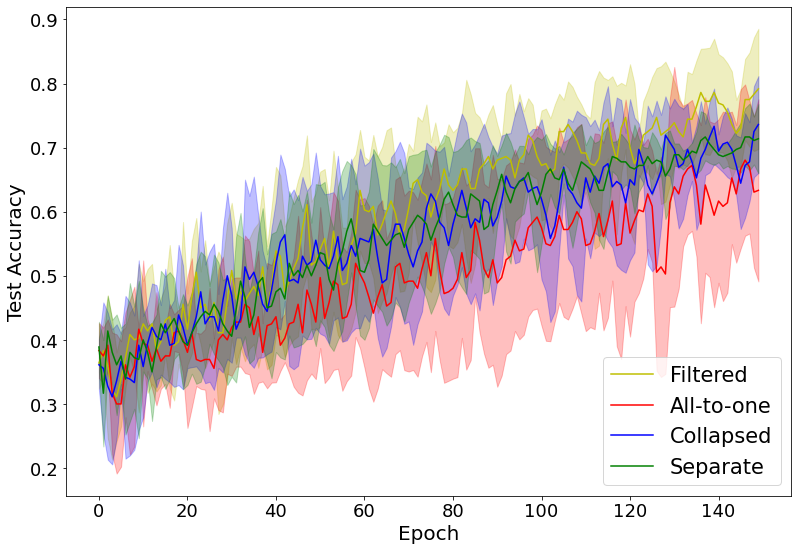

In [6]:
# draw the lines for the means
plt.plot(mean_acc_filtered.index.values, mean_acc_filtered, 'y-', label='Filtered')
plt.plot(mean_acc_alltoone.index.values, mean_acc_alltoone, 'r-', label='All-to-one')
plt.plot(mean_acc_collapsed.index.values, mean_acc_collapsed, 'b-', label='Collapsed')
plt.plot(mean_acc_separate.index.values, mean_acc_separate, 'g-', label='Separate')

# fill between the standard deviations
plt.fill_between(std_acc_filtered.index.values, mean_acc_filtered - std_acc_filtered, mean_acc_filtered + std_acc_filtered, color='y', alpha=0.25)
plt.fill_between(std_acc_alltoone.index.values, mean_acc_alltoone - std_acc_alltoone, mean_acc_alltoone + std_acc_alltoone, color='r', alpha=0.25)
plt.fill_between(std_acc_collapsed.index.values, mean_acc_collapsed - std_acc_collapsed, mean_acc_collapsed + std_acc_collapsed, color='b', alpha=0.25)
plt.fill_between(std_acc_separate.index.values, mean_acc_separate - std_acc_separate, mean_acc_separate + std_acc_separate, color='g', alpha=0.25)

plt.legend(loc="lower right", fontsize=21)
# plt.title("Test Accuracy of GAT for AIFB+ Dataset with Different Literal Mappings", fontsize=19)
plt.xticks(fontsize=18)
plt.yticks(fontsize = 18)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Test Accuracy', fontsize=20)

# increase size of figure
figure = plt.gcf()
figure.set_size_inches(13, 9)

# save the figure
figure.savefig('../plots/experiment_data_analysis/aifb/gat_test_acc.png', dpi=300)

plt.show()

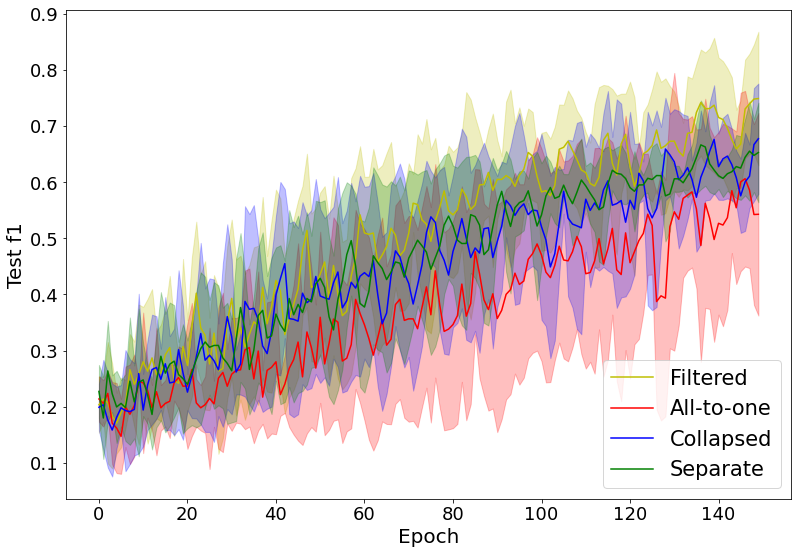

In [7]:
# draw the lines for the means
plt.plot(mean_f1_filtered.index.values, mean_f1_filtered, 'y-', label='Filtered')
plt.plot(mean_f1_alltoone.index.values, mean_f1_alltoone, 'r-', label='All-to-one')
plt.plot(mean_f1_collapsed.index.values, mean_f1_collapsed, 'b-', label='Collapsed')
plt.plot(mean_f1_separate.index.values, mean_f1_separate, 'g-', label='Separate')

# fill between the standard deviations
plt.fill_between(std_f1_filtered.index.values, mean_f1_filtered - std_f1_filtered, mean_f1_filtered + std_f1_filtered, color='y', alpha=0.25)
plt.fill_between(std_f1_alltoone.index.values, mean_f1_alltoone - std_f1_alltoone, mean_f1_alltoone + std_f1_alltoone, color='r', alpha=0.25)
plt.fill_between(std_f1_collapsed.index.values, mean_f1_collapsed - std_f1_collapsed, mean_f1_collapsed + std_f1_collapsed, color='b', alpha=0.25)
plt.fill_between(std_f1_separate.index.values, mean_f1_separate - std_f1_separate, mean_f1_separate + std_f1_separate, color='g', alpha=0.25)

plt.legend(loc="lower right", fontsize=21)
# plt.title("Test f1 of GAT for AIFB+ Dataset with Different Literal Mappings", fontsize=19)
plt.xticks(fontsize=18)
plt.yticks(fontsize = 18)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Test f1', fontsize=20)

# increase size of figure
figure = plt.gcf()
figure.set_size_inches(13, 9)

# save the figure
figure.savefig('../plots/experiment_data_analysis/aifb/gat_test_f1.png', dpi=300)
plt.show()

### Boxplot:

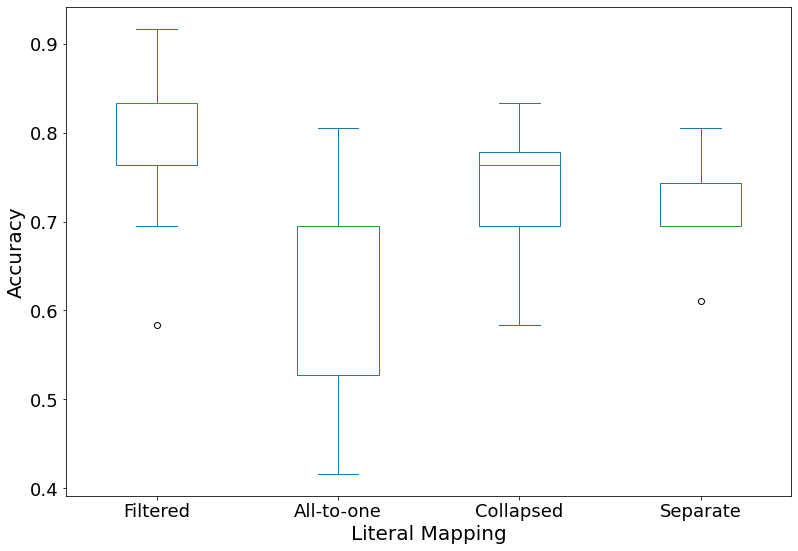

In [8]:
final_acc_all = pd.DataFrame({"Filtered": final_accuracy_test_filtered, "All-to-one": final_accuracy_test_alltoone, "Collapsed": final_accuracy_test_collapsed, "Separate": final_accuracy_test_separate})
final_acc_all[['Filtered', 'All-to-one', 'Collapsed', "Separate"]].plot(kind='box')

# add x and y labels and change font sizes:
plt.xlabel('Literal Mapping', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize = 18)

# increase size of figure
figure = plt.gcf()
figure.set_size_inches(13, 9)

# save the figure
figure.savefig('../plots/experiment_data_analysis/aifb/gat_boxplot_accuracy.png', dpi=300)
plt.show()

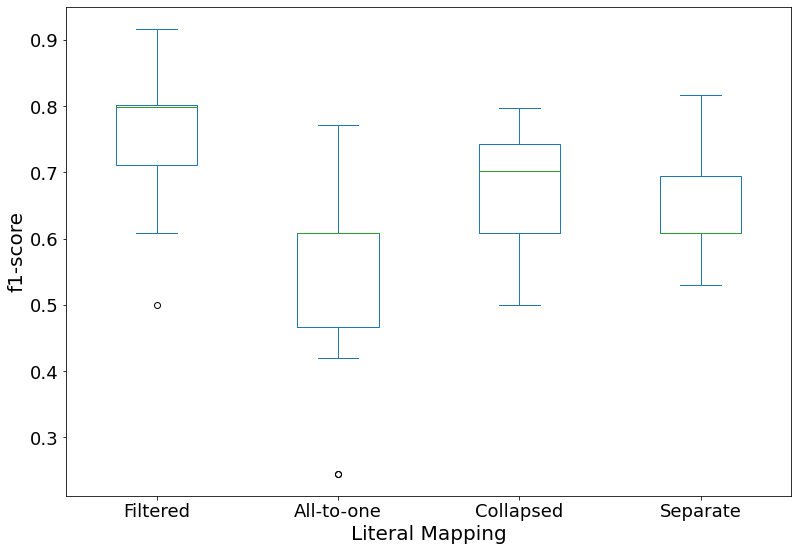

In [9]:
final_acc_all = pd.DataFrame({"Filtered": final_f1_test_filtered, "All-to-one": final_f1_test_alltoone, "Collapsed": final_f1_test_collapsed, "Separate": final_f1_test_separate})
final_acc_all[['Filtered', 'All-to-one', 'Collapsed', "Separate"]].plot(kind='box')

# add x and y labels and change font sizes:
plt.xlabel('Literal Mapping', fontsize=20)
plt.ylabel('f1-score', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize = 18)

# increase size of figure
figure = plt.gcf()
figure.set_size_inches(13, 9)

# save the figure
figure.savefig('../plots/experiment_data_analysis/aifb/gat_boxplot_f1.png', dpi=300)
plt.show()

## Perform statistical analysis:

### Normality tests (not needed):

In [10]:
print("------Accuracy------")
print("Filtered:", stats.shapiro(final_accuracy_test_filtered))
print("All-to-one:", stats.shapiro(final_accuracy_test_alltoone)) # not from a normal dist
print("Collapsed:", stats.shapiro(final_accuracy_test_collapsed))
print("Separate:", stats.shapiro(final_accuracy_test_separate))

print("------f1------")
print("Filtered:", stats.shapiro(final_f1_test_filtered))
print("All-to-one:", stats.shapiro(final_f1_test_alltoone)) # not from a normal dist
print("Collapsed:", stats.shapiro(final_f1_test_collapsed))
print("Separate:", stats.shapiro(final_f1_test_separate))

------Accuracy------
Filtered: ShapiroResult(statistic=0.8429455757141113, pvalue=0.04785613715648651)
All-to-one: ShapiroResult(statistic=0.7960003018379211, pvalue=0.012962885200977325)
Collapsed: ShapiroResult(statistic=0.9289669394493103, pvalue=0.43780815601348877)
Separate: ShapiroResult(statistic=0.9047325253486633, pvalue=0.24673150479793549)
------f1------
Filtered: ShapiroResult(statistic=0.8547359704971313, pvalue=0.06612082570791245)
All-to-one: ShapiroResult(statistic=0.8344586491584778, pvalue=0.03786005079746246)
Collapsed: ShapiroResult(statistic=0.932975709438324, pvalue=0.47779205441474915)
Separate: ShapiroResult(statistic=0.8684645891189575, pvalue=0.09592556953430176)


### Mann-Whitney U tests:

In [11]:
# combinations (for all of these, do a test between both the accuracy and the f1)

# filtered - all-to-one
print("Accuracy, Filtered - All-to-one: ", stats.mannwhitneyu(final_accuracy_test_filtered, final_accuracy_test_alltoone))
print("f1-score, Filtered - All-to-one: ", stats.mannwhitneyu(final_f1_test_filtered, final_f1_test_alltoone))

# filtered - collapsed
print("Accuracy, Filtered - Collapsed: ", stats.mannwhitneyu(final_accuracy_test_filtered, final_accuracy_test_collapsed))
print("f1-score, Filtered - Collapsed: ", stats.mannwhitneyu(final_f1_test_filtered, final_f1_test_collapsed))

# filtered - separate
print("Accuracy, Filtered - Separate: ", stats.mannwhitneyu(final_accuracy_test_filtered, final_accuracy_test_separate))
print("f1-score, Filtered - Separate: ", stats.mannwhitneyu(final_f1_test_filtered, final_f1_test_separate))

# all-to-one - collapsed
print("Accuracy, All-to-one - Collapsed: ", stats.mannwhitneyu(final_accuracy_test_alltoone, final_accuracy_test_collapsed))
print("f1-score, All-to-one - Collapsed: ", stats.mannwhitneyu(final_f1_test_alltoone, final_f1_test_collapsed))

# all-to-one - separate
print("Accuracy, All-to-one - Separate: ", stats.mannwhitneyu(final_accuracy_test_alltoone, final_accuracy_test_separate))
print("f1-score, All-to-one - Separate: ", stats.mannwhitneyu(final_f1_test_alltoone, final_f1_test_separate))
      
# collapsed - separate
print("Accuracy, Collapsed - Separate: ", stats.mannwhitneyu(final_accuracy_test_collapsed, final_accuracy_test_separate))
print("f1-score, Collapsed - Separate: ", stats.mannwhitneyu(final_f1_test_collapsed, final_f1_test_separate))

Accuracy, Filtered - All-to-one:  MannwhitneyuResult(statistic=86.5, pvalue=0.005390931627916147)
f1-score, Filtered - All-to-one:  MannwhitneyuResult(statistic=86.5, pvalue=0.005780029064335987)
Accuracy, Filtered - Collapsed:  MannwhitneyuResult(statistic=74.0, pvalue=0.07061056939696685)
f1-score, Filtered - Collapsed:  MannwhitneyuResult(statistic=76.5, pvalue=0.048854007021222515)
Accuracy, Filtered - Separate:  MannwhitneyuResult(statistic=80.5, pvalue=0.020449199979642174)
f1-score, Filtered - Separate:  MannwhitneyuResult(statistic=73.5, pvalue=0.07795857369343434)
Accuracy, All-to-one - Collapsed:  MannwhitneyuResult(statistic=28.0, pvalue=0.09588009038073057)
f1-score, All-to-one - Collapsed:  MannwhitneyuResult(statistic=28.0, pvalue=0.09666627282468213)
Accuracy, All-to-one - Separate:  MannwhitneyuResult(statistic=34.5, pvalue=0.2250933108592259)
f1-score, All-to-one - Separate:  MannwhitneyuResult(statistic=33.0, pvalue=0.18225917218657506)
Accuracy, Collapsed - Separate:

### Apply majority voting (for other classification tests):

In [12]:
# read in the class assignments (do this for the test data):
preds_filtered_1 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_1/predictions_test.csv")
preds_filtered_2 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_2/predictions_test.csv")
preds_filtered_3 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_3/predictions_test.csv")
preds_filtered_4 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_4/predictions_test.csv")
preds_filtered_5 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_5/predictions_test.csv")
preds_filtered_6 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_6/predictions_test.csv")
preds_filtered_7 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_7/predictions_test.csv")
preds_filtered_8 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_8/predictions_test.csv")
preds_filtered_9 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_9/predictions_test.csv")
preds_filtered_10 = pd.read_csv("../results/GAT/test_aifb_filtered_final/aifb_10/predictions_test.csv")

preds_alltoone_1 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_1/predictions_test.csv")
preds_alltoone_2 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_2/predictions_test.csv")
preds_alltoone_3 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_3/predictions_test.csv")
preds_alltoone_4 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_4/predictions_test.csv")
preds_alltoone_5 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_5/predictions_test.csv")
preds_alltoone_6 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_6/predictions_test.csv")
preds_alltoone_7 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_7/predictions_test.csv")
preds_alltoone_8 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_8/predictions_test.csv")
preds_alltoone_9 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_9/predictions_test.csv")
preds_alltoone_10 = pd.read_csv("../results/GAT/test_aifb_all-to-one_final/aifb_10/predictions_test.csv")

preds_collapsed_1 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_1/predictions_test.csv")
preds_collapsed_2 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_2/predictions_test.csv")
preds_collapsed_3 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_3/predictions_test.csv")
preds_collapsed_4 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_4/predictions_test.csv")
preds_collapsed_5 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_5/predictions_test.csv")
preds_collapsed_6 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_6/predictions_test.csv")
preds_collapsed_7 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_7/predictions_test.csv")
preds_collapsed_8 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_8/predictions_test.csv")
preds_collapsed_9 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_9/predictions_test.csv")
preds_collapsed_10 = pd.read_csv("../results/GAT/test_aifb_collapsed_final/aifb_10/predictions_test.csv")

preds_separate_1 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_1/predictions_test.csv")
preds_separate_2 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_2/predictions_test.csv")
preds_separate_3 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_3/predictions_test.csv")
preds_separate_4 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_4/predictions_test.csv")
preds_separate_5 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_5/predictions_test.csv")
preds_separate_6 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_6/predictions_test.csv")
preds_separate_7 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_7/predictions_test.csv")
preds_separate_8 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_8/predictions_test.csv")
preds_separate_9 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_9/predictions_test.csv")
preds_separate_10 = pd.read_csv("../results/GAT/test_aifb_separate_final/aifb_10/predictions_test.csv")

In [13]:
preds_filtered_1.rename(columns={"PredictedLabel":"P1"}, inplace=True)
preds_filtered_2.rename(columns={"PredictedLabel":"P2"}, inplace=True)
preds_filtered_3.rename(columns={"PredictedLabel":"P3"}, inplace=True)
preds_filtered_4.rename(columns={"PredictedLabel":"P4"}, inplace=True)
preds_filtered_5.rename(columns={"PredictedLabel":"P5"}, inplace=True)
preds_filtered_6.rename(columns={"PredictedLabel":"P6"}, inplace=True)
preds_filtered_7.rename(columns={"PredictedLabel":"P7"}, inplace=True)
preds_filtered_8.rename(columns={"PredictedLabel":"P8"}, inplace=True)
preds_filtered_9.rename(columns={"PredictedLabel":"P9"}, inplace=True)
preds_filtered_10.rename(columns={"PredictedLabel":"P10"}, inplace=True)

preds_alltoone_1.rename(columns={"PredictedLabel":"P1"}, inplace=True)
preds_alltoone_2.rename(columns={"PredictedLabel":"P2"}, inplace=True)
preds_alltoone_3.rename(columns={"PredictedLabel":"P3"}, inplace=True)
preds_alltoone_4.rename(columns={"PredictedLabel":"P4"}, inplace=True)
preds_alltoone_5.rename(columns={"PredictedLabel":"P5"}, inplace=True)
preds_alltoone_6.rename(columns={"PredictedLabel":"P6"}, inplace=True)
preds_alltoone_7.rename(columns={"PredictedLabel":"P7"}, inplace=True)
preds_alltoone_8.rename(columns={"PredictedLabel":"P8"}, inplace=True)
preds_alltoone_9.rename(columns={"PredictedLabel":"P9"}, inplace=True)
preds_alltoone_10.rename(columns={"PredictedLabel":"P10"}, inplace=True)

preds_collapsed_1.rename(columns={"PredictedLabel":"P1"}, inplace=True)
preds_collapsed_2.rename(columns={"PredictedLabel":"P2"}, inplace=True)
preds_collapsed_3.rename(columns={"PredictedLabel":"P3"}, inplace=True)
preds_collapsed_4.rename(columns={"PredictedLabel":"P4"}, inplace=True)
preds_collapsed_5.rename(columns={"PredictedLabel":"P5"}, inplace=True)
preds_collapsed_6.rename(columns={"PredictedLabel":"P6"}, inplace=True)
preds_collapsed_7.rename(columns={"PredictedLabel":"P7"}, inplace=True)
preds_collapsed_8.rename(columns={"PredictedLabel":"P8"}, inplace=True)
preds_collapsed_9.rename(columns={"PredictedLabel":"P9"}, inplace=True)
preds_collapsed_10.rename(columns={"PredictedLabel":"P10"}, inplace=True)

preds_separate_1.rename(columns={"PredictedLabel":"P1"}, inplace=True)
preds_separate_2.rename(columns={"PredictedLabel":"P2"}, inplace=True)
preds_separate_3.rename(columns={"PredictedLabel":"P3"}, inplace=True)
preds_separate_4.rename(columns={"PredictedLabel":"P4"}, inplace=True)
preds_separate_5.rename(columns={"PredictedLabel":"P5"}, inplace=True)
preds_separate_6.rename(columns={"PredictedLabel":"P6"}, inplace=True)
preds_separate_7.rename(columns={"PredictedLabel":"P7"}, inplace=True)
preds_separate_8.rename(columns={"PredictedLabel":"P8"}, inplace=True)
preds_separate_9.rename(columns={"PredictedLabel":"P9"}, inplace=True)
preds_separate_10.rename(columns={"PredictedLabel":"P10"}, inplace=True)

In [14]:
predictions_all_filtered = preds_filtered_1

for dataframe in [preds_filtered_2, preds_filtered_3, preds_filtered_4, preds_filtered_5, preds_filtered_6, preds_filtered_7, preds_filtered_8, preds_filtered_9, preds_filtered_10]:
    predictions_all_filtered= pd.merge(predictions_all_filtered, dataframe)
                                      
predictions_all_filtered.set_index('ID', inplace=True)

# ----------------

predictions_all_alltoone = preds_alltoone_1

for dataframe in [preds_alltoone_2, preds_alltoone_3, preds_alltoone_4, preds_alltoone_5, preds_alltoone_6, preds_alltoone_7, preds_alltoone_8, preds_alltoone_9, preds_alltoone_10]:
    predictions_all_alltoone= pd.merge(predictions_all_alltoone, dataframe)
                                      
predictions_all_alltoone.set_index('ID', inplace=True)

# ----------------

predictions_all_collapsed = preds_collapsed_1

for dataframe in [preds_collapsed_2, preds_collapsed_3, preds_collapsed_4, preds_collapsed_5, preds_collapsed_6, preds_collapsed_7, preds_collapsed_8, preds_collapsed_9, preds_collapsed_10]:
    predictions_all_collapsed = pd.merge(predictions_all_collapsed, dataframe)
                                      
predictions_all_collapsed.set_index('ID', inplace=True)

# ----------------

predictions_all_separate = preds_separate_1

for dataframe in [preds_separate_2, preds_separate_3, preds_separate_4, preds_separate_5, preds_separate_6, preds_separate_7, preds_separate_8, preds_separate_9, preds_separate_10]:
    predictions_all_separate = pd.merge(predictions_all_separate, dataframe)
                                      
predictions_all_separate.set_index('ID', inplace=True)

In [15]:
predictions_filtered_mode = predictions_all_filtered[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']].mode(axis='columns')
predictions_alltoone_mode = predictions_all_alltoone[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']].mode(axis='columns')
predictions_collapsed_mode = predictions_all_collapsed[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']].mode(axis='columns')
predictions_separate_mode = predictions_all_separate[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']].mode(axis='columns')

In [16]:
print(predictions_filtered_mode.shape)
print(predictions_alltoone_mode.shape)
print(predictions_collapsed_mode.shape)
print(predictions_separate_mode.shape)

(36, 1)
(36, 1)
(36, 1)
(36, 1)


In [17]:
def make_choice(col_0, col_1):
    if not math.isnan(col_1) and random.choice([0,1]) == 1:
        return int(col_1)
    else:
        return int(col_0)

predictions_all_filtered['MJ'] = predictions_filtered_mode[0]
predictions_all_alltoone['MJ'] = predictions_alltoone_mode[0]
predictions_all_collapsed['MJ'] = predictions_collapsed_mode[0]
predictions_all_separate['MJ'] = predictions_separate_mode[0]

In [18]:
# these will all be different because they were read in differently:

filtered_file = open("../results/GAT/test_aifb_filtered_final/label_mapping.json")
filtered_mapping = json.load(filtered_file)
print(filtered_mapping)
print()

alltoone_file = open("../results/GAT/test_aifb_all-to-one_final/label_mapping.json")
alltoone_mapping = json.load(alltoone_file)
print(alltoone_mapping)
print()

collapsed_file = open("../results/GAT/test_aifb_collapsed_final/label_mapping.json")
collapsed_mapping = json.load(collapsed_file)
print(collapsed_mapping)
print()

separate_file = open("../results/GAT/test_aifb_separate_final/label_mapping.json")
separate_mapping = json.load(separate_file)
print(separate_mapping)
print()

{'http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance': 0, 'http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id3instance': 1, 'http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id2instance': 2, 'http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id4instance': 3}

{'http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id2instance': 0, 'http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance': 1, 'http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id3instance': 2, 'http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id4instance': 3}

{'http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance': 0, 'http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id2instance': 1, 'http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschung

In [19]:
# revert these (so we can turn the mapping back around!)
filtered_mapping_rev = {value: key for key, value in filtered_mapping.items()}
alltoone_mapping_rev = {value: key for key, value in alltoone_mapping.items()}
collapsed_mapping_rev = {value: key for key, value in collapsed_mapping.items()}
separate_mapping_rev = {value: key for key, value in separate_mapping.items()}

In [20]:
# change it back to the original classes:
predictions_all_filtered['MJ_fil'] = predictions_all_filtered['MJ'].map(filtered_mapping_rev)
predictions_all_alltoone['MJ_ato'] = predictions_all_alltoone['MJ'].map(alltoone_mapping_rev)
predictions_all_collapsed['MJ_col'] = predictions_all_collapsed['MJ'].map(collapsed_mapping_rev)
predictions_all_separate['MJ_sep'] = predictions_all_separate['MJ'].map(separate_mapping_rev)

In [21]:
# put the actual entities as the index for everything!
predictions_all_filtered.set_index('Entity', inplace=True)
predictions_all_alltoone.set_index('Entity', inplace=True)
predictions_all_collapsed.set_index('Entity', inplace=True)
predictions_all_separate.set_index('Entity', inplace=True)

In [22]:
predictions_all_filtered.head(5)

,P1,TrueLabel,P2,P3,P4,P5,P6,P7,P8,P9,P10,MJ,MJ_fil
Entity,,,,,,,,,,,,,
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id37instance,2,2,2,0,0,0,2,2,2,2,2,2,http://www.aifb.uni-karlsruhe.de/Forschungsgru...
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id42instance,0,0,0,0,0,0,0,0,0,0,0,0,http://www.aifb.uni-karlsruhe.de/Forschungsgru...
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1851instance,0,0,0,0,0,0,0,0,0,0,0,0,http://www.aifb.uni-karlsruhe.de/Forschungsgru...
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2118instance,2,2,2,0,0,0,2,2,2,2,2,2,http://www.aifb.uni-karlsruhe.de/Forschungsgru...
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1876instance,0,0,0,0,0,0,0,0,0,0,0,0,http://www.aifb.uni-karlsruhe.de/Forschungsgru...


In [23]:
# now, link everything to their actual entity and add everything in one dataframe --> then we can start comparing!
all_predictions = pd.concat([predictions_all_filtered['MJ_fil'], predictions_all_alltoone['MJ_ato'], predictions_all_collapsed['MJ_col'], predictions_all_separate['MJ_sep']], axis=1, keys=['filtered', 'all-to-one', 'collapsed', 'separate'])
all_predictions.head(5)

,filtered,all-to-one,collapsed,separate
Entity,,,,
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id37instance,http://www.aifb.uni-karlsruhe.de/Forschungsgru...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id42instance,http://www.aifb.uni-karlsruhe.de/Forschungsgru...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1851instance,http://www.aifb.uni-karlsruhe.de/Forschungsgru...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2118instance,http://www.aifb.uni-karlsruhe.de/Forschungsgru...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1876instance,http://www.aifb.uni-karlsruhe.de/Forschungsgru...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...


In [24]:
official_mapping = {'http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id4instance':4, 'http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id3instance':3, 'http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id2instance':2, 'http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance':1}

In [25]:
all_predictions['filtered'] = all_predictions['filtered'].map(official_mapping)
all_predictions['all-to-one'] = all_predictions['all-to-one'].map(official_mapping)
all_predictions['collapsed'] = all_predictions['collapsed'].map(official_mapping)
all_predictions['separate'] = all_predictions['separate'].map(official_mapping)

In [26]:
true_lab = predictions_all_filtered['TrueLabel'].map(filtered_mapping_rev)
all_predictions['true_label'] = true_lab.map(official_mapping)

In [27]:
all_predictions.head(10)

,filtered,all-to-one,collapsed,separate,true_label
Entity,,,,,
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id37instance,2,1,1,1,2
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id42instance,1,1,1,1,1
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1851instance,1,1,1,1,1
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2118instance,2,1,1,1,2
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1876instance,1,1,1,1,1
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id81instance,1,1,1,1,2
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id32instance,3,3,3,3,3
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id82instance,1,1,1,1,1
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id13instance,3,3,3,3,3


### Other tests (mlstats package):

In [28]:
print("Number predicted classes in filtered: ", len(np.unique(all_predictions['filtered'].to_numpy())))
print("Number predicted classes in all-to-one: ", len(np.unique(all_predictions['all-to-one'].to_numpy())))
print("Number predicted classes in collapsed: ", len(np.unique(all_predictions['collapsed'].to_numpy())))
print("Number predicted classes in separate: ", len(np.unique(all_predictions['separate'].to_numpy())))

Number predicted classes in filtered:  3
Number predicted classes in all-to-one:  2
Number predicted classes in collapsed:  2
Number predicted classes in separate:  2


In [29]:
all_predictions_tf = all_predictions.copy()

In [30]:
def same(label, true_label):
    return int(label == true_label)

all_predictions_tf['filtered'] = all_predictions.apply(lambda x: same(x['filtered'], x['true_label']), axis=1)
all_predictions_tf['all-to-one'] = all_predictions.apply(lambda x: same(x['all-to-one'], x['true_label']), axis=1)
all_predictions_tf['collapsed'] = all_predictions.apply(lambda x: same(x['collapsed'], x['true_label']), axis=1)
all_predictions_tf['separate'] = all_predictions.apply(lambda x: same(x['separate'], x['true_label']), axis=1)

In [31]:
all_predictions_tf[['filtered', 'all-to-one', 'collapsed', 'separate']].head(10)

,filtered,all-to-one,collapsed,separate
Entity,,,,
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id37instance,1,0,0,0
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id42instance,1,1,1,1
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1851instance,1,1,1,1
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2118instance,1,0,0,0
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1876instance,1,1,1,1
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id81instance,0,0,0,0
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id32instance,1,1,1,1
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id82instance,1,1,1,1
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id13instance,1,1,1,1


In [32]:
modcomp.cochran_q(all_predictions_tf[['filtered', 'all-to-one', 'collapsed', 'separate']].T.to_numpy())

TestResults(p=0.0018166489665723214, Q=15.0)

In [33]:
# filtered - all-to-one
print("Exact McNemar between Correct/Incorrect, Filtered - All-to-one: ", modcomp.mcnemar_exact(all_predictions_tf['filtered'].to_numpy(), all_predictions_tf['all-to-one'].to_numpy(), mid_p_correction=True))

# filtered - collapsed
print("Exact McNemar between Correct/Incorrect, Filtered - Collapsed: ", modcomp.mcnemar_exact(all_predictions_tf['filtered'].to_numpy(), all_predictions_tf['collapsed'].to_numpy(), mid_p_correction=True))

# filtered - separate
print("Exact McNemar between Correct/Incorrect, Filtered - Separate: ", modcomp.mcnemar_exact(all_predictions_tf['filtered'].to_numpy(), all_predictions_tf['separate'].to_numpy(), mid_p_correction=True))

# all-to-one - collapsed
print("Exact McNemar between Correct/Incorrect, All-to-one - Collapsed: ", modcomp.mcnemar_exact(all_predictions_tf['all-to-one'].to_numpy(), all_predictions_tf['collapsed'].to_numpy(), mid_p_correction=True))

# all-to-one - separate
print("Exact McNemar between Correct/Incorrect, All-to-one - Separate: ", modcomp.mcnemar_exact(all_predictions_tf['all-to-one'].to_numpy(), all_predictions_tf['separate'].to_numpy(), mid_p_correction=True))

# collapsed - separate
print("Exact McNemar between Correct/Incorrect, Collapsed - Separate: ", modcomp.mcnemar_exact(all_predictions_tf['collapsed'].to_numpy(), all_predictions_tf['separate'].to_numpy(), mid_p_correction=True))

Exact McNemar between Correct/Incorrect, Filtered - All-to-one:  TestResults(p=0.03125)
Exact McNemar between Correct/Incorrect, Filtered - Collapsed:  TestResults(p=0.03125)
Exact McNemar between Correct/Incorrect, Filtered - Separate:  TestResults(p=0.03125)
Exact McNemar between Correct/Incorrect, All-to-one - Collapsed:  TestResults(p=1.0)
Exact McNemar between Correct/Incorrect, All-to-one - Separate:  TestResults(p=1.0)
Exact McNemar between Correct/Incorrect, Collapsed - Separate:  TestResults(p=1.0)


In [34]:
# filtered - all-to-one -> these two do not have the same nr of predicted classes
print("Stuart-Maxwell, Filtered - All-to-one: ", modcomp.stuart_maxwell(all_predictions['filtered'].to_numpy(), all_predictions['all-to-one'].to_numpy(), 4))

# filtered - collapsed
print("Stuart-Maxwell, Filtered - Collapsed: ", modcomp.stuart_maxwell(all_predictions['filtered'].to_numpy(), all_predictions['collapsed'].to_numpy(), 4))

# filtered - separate
print("Stuart-Maxwell, Filtered - Separate: ", modcomp.stuart_maxwell(all_predictions['filtered'].to_numpy(), all_predictions['separate'].to_numpy(), 4))

# all-to-one - collapsed
print("Stuart-Maxwell, All-to-one - Collapsed: ", modcomp.stuart_maxwell(all_predictions['all-to-one'].to_numpy(), all_predictions['collapsed'].to_numpy(), 4))

# all-to-one - separate
print("Stuart-Maxwell, All-to-one - Separate: ", modcomp.stuart_maxwell(all_predictions['all-to-one'].to_numpy(), all_predictions['separate'].to_numpy(), 4))

# collapsed - separate
print("Stuart-Maxwell, Collapsed - Separate: ", modcomp.stuart_maxwell(all_predictions['collapsed'].to_numpy(), all_predictions['separate'].to_numpy(), 4))

ValueError: operands could not be broadcast together with shapes (3,) (2,) 